<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Ксения! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Многие части проекта (включая характерные ошибки) в этом проекте мне "до боли знакомы". Это работы студентов первых потоков.

Я сейчас не буду ставить вопрос о плагиате, искать первоисточники и сличать работы "под микроскопом". Но некоторые моменты, которые в другом случае могли бы быть подсвечены исключительно желтым комментарием я буду настаивать на переработке красным.
</div>

# Проект: Поиск по изображениям

**Цель** проекта: создать модель  для фотохостинга профессиональных фотографов «Со Смыслом» (“With Sense”), чтобы она сопоставляла текст описания фотографии и саму фотографию и резюмировала, насколько они друг другу подходят.

# Описание данных.

Данные состоят из пяти таблиц и двух папок с фотографиями.
В файле **train_dataset.csv** находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания.

В файле **test_queries.csv** находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение.

В файле **CrowdAnnotations.tsv** — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Содержит информацию:
- об имени файла изображения,
- идентификаторе описания,
- о доле людей, подтвердивших, что описание соответствует изображению,
- о количестве человек, подтвердивших, что описание соответствует изображению,
- о количестве человек, подтвердивших, что описание не соответствует изображению.

В файле **ExpertAnnotations.tsv** содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Хранит информацию:
- об имени файла изображения,
- об идентияикаторе описания,
- оценки трёх экспертов о соответствии изображения и описания.

В папке **train_images** содержатся изображения для тренировки модели.

В папке **test_images** содержатся изображения для тестирования модели.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

Загрузим необходимые библиотеки.

In [ ]:
import os
import pandas as pd
import math
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from tqdm import notebook
tqdm.pandas()

from PIL import Image
from pathlib import Path


from sklearn.model_selection import train_test_split, GridSearchCV, GroupShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import accuracy_score, log_loss, f1_score, mean_squared_error
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization, Reshape, RepeatVector, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

import spacy
nlp = spacy.load('en_core_web_sm')
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [ ]:
from google.colab import drive
from google.colab import files

drive.mount("/content/drive")

Mounted at /content/drive


Загрузим файлы с данными.

In [ ]:
DATA_PATH = '/content/drive/MyDrive/'
TRAIN_IMAGES_PATH = os.path.join(DATA_PATH, 'train_images')
TEST_IMAGES_PATH = os.path.join(DATA_PATH, 'test_images')
TRAIN_DATASET_PATH = os.path.join(DATA_PATH, 'train_dataset.csv')
EXPERT_ANNOTATIONS_PATH = os.path.join(DATA_PATH, 'ExpertAnnotations.tsv')
TEST_QUERIES_PATH = os.path.join(DATA_PATH, 'test_queries.csv')
CROWD_ANNOTATIONS_PATH = os.path.join(DATA_PATH, 'CrowdAnnotations.tsv')

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Я вижу, что в твоём коде используются "захардкоженные" абсолютные пути (например, `'/content/drive/MyDrive/train_images'`). Это критическая проблема, так как твой ноутбук невозможно запустить на другой машине — у ревьюера, твоего коллеги или даже у тебя на другом компьютере папка с проектом может лежать в другом месте.

Профессиональный подход к решению этой задачи выглядит так:

1.  **Создается одна базовая константа**, в которой хранится путь к папке с данными.
2.  **Все остальные пути генерируются** на основе этой константы с помощью специальной функции `os.path.join()`.

**Почему это важно?**

  * **Портативность:** Чтобы запустить твой код, другому человеку достаточно будет изменить всего одну строчку — значение константы `DATA_PATH`.
  * **Надежность:** Функция `os.path.join()` сама подбирает правильный разделитель для разных операционных систем (в Windows это `\`, а в Linux/MacOS — `/`), делая твой код универсальным.

Вот как должен выглядеть твой код:

```python
import os

# Единственное место, которое нужно менять при переносе проекта
DATA_PATH = '/content/drive/MyDrive/' # или любой другой твой путь к папке

# Все остальные пути строятся от базового
TRAIN_IMAGES_PATH = os.path.join(DATA_PATH, 'train_images')
TEST_IMAGES_PATH = os.path.join(DATA_PATH, 'test_images')
TRAIN_DATASET_PATH = os.path.join(DATA_PATH, 'train_dataset.csv')
EXPERT_ANNOTATIONS_PATH = os.path.join(DATA_PATH, 'ExpertAnnotations.tsv')
# и так далее для всех файлов...

# Пример использования
expert_df = pd.read_csv(EXPERT_ANNOTATIONS_PATH, sep='\\t', ...)
```

Пожалуйста, исправь этот момент. Это один из ключевых навыков для работы в команде.

----------------    

В дополнение к путям, я хотел бы обратить твоё внимание на именование переменных. Названия вроде `path_1`, `path_2`, `path_7` не несут никакой смысловой нагрузки. Они заставляют постоянно возвращаться к ячейке и проверять, какой файл скрывается за каким номером. Код должен быть самодокументируемым.

Представь, что ты вернешься к этому проекту через месяц. Сможешь ли ты сразу вспомнить, что лежит в `path_5`?

**Как лучше?**
Используй "говорящие" имена, которые сразу описывают, что хранится в переменной. Сравним:

  * **Было:** `path_5 = '/content/drive/MyDrive/ExpertAnnotations.tsv'`
  * **Стало:** `EXPERT_ANNOTATIONS_PATH = os.path.join(DATA_PATH, 'ExpertAnnotations.tsv')`

Такой код читать и поддерживать намного проще. В примере выше я уже использовал осмысленные имена — рекомендую тебе взять этот подход на вооружение.
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Дима, привет!
    
Исправила.
    
Спасибо тебе большое за такой развёрнутый совет! Я задавала вопрос о путях path преподавателю (потому что у меня были какие-то странные ошибке в загрузке, и я переживала, что целую вечность вожусь только с тем, чтобы увидеть данные), но по полезности ответы и преподавателя, и моих однокурсников сильно устапают твоему)
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> исправлено 👍 </div>

In [ ]:
train_data = pd.read_csv(TRAIN_DATASET_PATH)
train_data.head()

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [ ]:
test_queries = pd.read_csv(TEST_QUERIES_PATH, sep='|')
test_queries.head()

,Unnamed: 0,query_id,query_text,image
0,0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


In [ ]:
expert_df = pd.read_csv(EXPERT_ANNOTATIONS_PATH, sep='\t', names=['image', 'query_id', 'expert_1', 'expert_2', 'expert_3'])
expert_df.head()

,image,query_id,expert_1,expert_2,expert_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


In [ ]:
crowd_df = pd.read_csv(CROWD_ANNOTATIONS_PATH, sep='\t', names=['image', 'query_id', 'fraction', 'match', 'dismatch'])
crowd_df.sample(5)

,image,query_id,fraction,match,dismatch
236,1107246521_d16a476380.jpg,2112921744_92bf706805.jpg#2,0.000000,0,3
47345,909191414_1cf5d85821.jpg,1490670858_e122df2560.jpg#2,0.250000,1,3
39385,3619416477_9d18580a14.jpg,3490736665_38710f4b91.jpg#2,0.000000,0,3
6198,2112921744_92bf706805.jpg,3004823335_9b82cbd8a7.jpg#2,0.333333,1,2
38185,3585598356_8ce815bbb9.jpg,3688858505_e8afd1475d.jpg#2,0.000000,0,3


Все полученные таблицы соответствуют описанию. Посмотрим файлы, содержащие изображения.

In [ ]:
def display_images_from_folder(folder_path, num_images=10):
    image_files = os.listdir(folder_path)
    num_images = min(num_images, len(image_files))

    fig, axes = plt.subplots(1, num_images, figsize=(15, 10))

    for i in range(num_images):
        image_file = os.path.join(folder_path, image_files[i])
        image = Image.open(image_file)
        axes[i].imshow(image)
        axes[i].axis('off')

    plt.show()

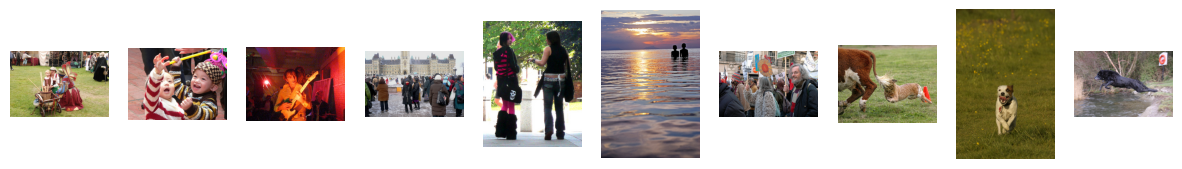

In [ ]:
display_images_from_folder(TRAIN_IMAGES_PATH, num_images=10)

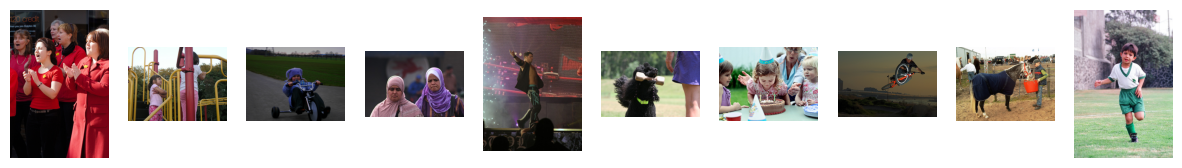

In [ ]:
display_images_from_folder(TEST_IMAGES_PATH, num_images=10)

Изображения отображаются корректно.

Изучим инфорамцию о таблицах.

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Добавлены графики для краутсорсинговых и экспертных оценок.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b>  👍 </div>

In [ ]:
crowd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     47830 non-null  object 
 1   query_id  47830 non-null  object 
 2   fraction  47830 non-null  float64
 3   match     47830 non-null  int64  
 4   dismatch  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [ ]:
crowd_df['image'].nunique()

1000

In [ ]:
crowd_df['query_id'].nunique()

1000

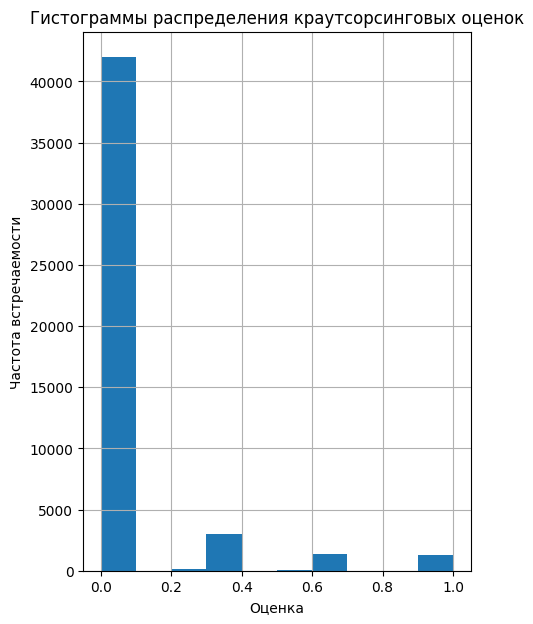

In [ ]:
crowd_df['fraction'].hist(figsize=(5, 7))
plt.title('Гистограммы распределения краутсорсинговых оценок')
plt.xlabel('Оценка')
plt.ylabel('Частота встречаемости');

График доли людей, подтвердивших, что описание соответствует изображению, показывает, что большинство голосовали за не соответсие изображения и описания.

Рассмотрим таблицу, содержащую информацию об оценках экспертов.

In [ ]:
expert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   expert_1  5822 non-null   int64 
 3   expert_2  5822 non-null   int64 
 4   expert_3  5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


In [ ]:
expert_df['image'].nunique()

1000

In [ ]:
expert_df['query_id'].nunique()

977

In [ ]:
expert_df.describe()

,expert_1,expert_2,expert_3
count,5822.000000,5822.000000,5822.000000
mean,1.436620,1.624356,1.881999
std,0.787084,0.856222,0.904087
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000


Посмотрим, как эксперты ставили оценки.

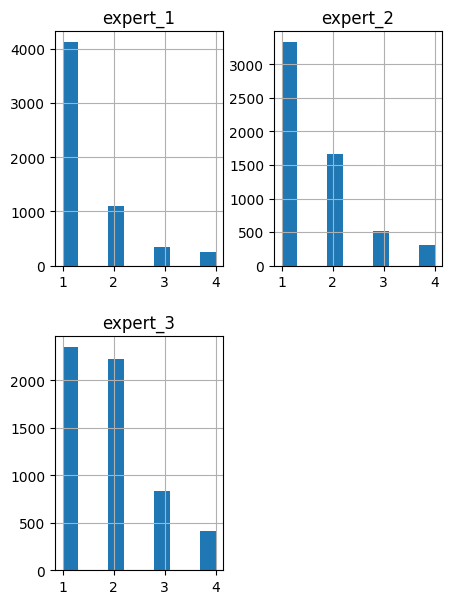

In [ ]:
expert_df.hist(figsize=(5, 7))
plt.title('Гистограммы распределения оценок экспертов')
plt.xlabel('Оценка')
plt.ylabel('Частота встречаемости');

Первый и второй эксперт чаще заключали, что текст и изображение не соответствуют друг другу, ставя оценку 1 более 4000  и 3000 раз соответственно. Третий эксперт был менее категоричен и находил элементы описания изображения в текстовом запросе: доля оценок 1 и 2 почти соответствует друг другу.

Для удобства дальнейшей работы мы предлагаем перевести оценки экспертов в диапазон (0,1).

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Привела диапазон оценок экспертов к (0,1)
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> исправлено 👍 </div>

In [ ]:
expert_df['score_1'] = (expert_df['expert_1'] - 1) / 3
expert_df['score_2'] = (expert_df['expert_2'] - 1) / 3
expert_df['score_3'] = (expert_df['expert_3'] - 1) / 3

In [ ]:
expert_df.sample()

,image,query_id,expert_1,expert_2,expert_3,score_1,score_2,score_3
1712,2543589122_ec3e55f434.jpg,539751252_2bd88c456b.jpg#2,2,2,2,0.333333,0.333333,0.333333


In [ ]:
test_queries['query_id'].nunique()

500

In [ ]:
train_data['query_id'].nunique()

977

**Вывод**
Мы загрузили необходимые библиотеки, загрузили и изучили данные. Все таблицы и изображения отображаются корректно. Модем приступить к исследовательскому анализу.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">


Здорово, что ты начала исследование с проверки базовых характеристик датасетов: посмотрела на количество уникальных значений через `.nunique()` и изучила общую информацию с помощью `.info()` и `.describe()`. Это правильный первый шаг в любом проекте!

Я вижу, что ты уже наметила путь, но предлагаю копнуть немного глубже, чтобы "почувствовать" данные и найти в них скрытые особенности. Это поможет тебе принимать более обоснованные решения на этапе предобработки.

Вот несколько идей, как можно развить твой анализ:

1.  **Добавь визуализаций.** Цифры в `.describe()` станут гораздо понятнее, если их визуализировать. Попробуй построить гистограммы для экспертных и краудсорсинговых оценок. Так ты сразу увидишь, какие оценки встречаются чаще, а какие — реже.
2.  **Используй "подсказку" в данных для оценки качества разметки.** В данных есть одна очень полезная деталь, которую ты могла пропустить. Взгляни на `query_id`: `1177994172_10d143cb8d.jpg#0`. Часть до символа `#` — это имя "родного" изображения для этого описания.
    * Ты можешь найти все такие "родные" пары и посмотреть, какие оценки им ставили. Это очень мощный способ понять, насколько "шумные" у нас данные и можно ли доверять разметке.
3.  **Изучай изображения целенаправленно.** Вместо просто случайных картинок, попробуй вывести примеры для разных групп: какие изображения получили максимальные оценки? А какие — минимальные? Есть ли картинки, по которым мнения экспертов сильно разошлись?

</div>

# Преобразование данных

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">


В этом разделе ты не выполняешь EDA. Частично исследовательский анализ данных выполняется в предыдущем разделе, а здесь ты сосредоточена на трансформации. Поэтому давай переименуем этот раздел.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Исправила
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> исправлено 👍 </div>

Рассмотрим таблицу expert_df. Вычислим среднюю оценку трёх экспертов и создадим новую переменную.

In [ ]:
expert_data = expert_df.drop(['expert_1', 'expert_2', 'expert_3'], axis=1)

In [ ]:
expert_data['score_avr'] = expert_data[['score_1', 'score_2', 'score_3']].mean(axis=1)

In [ ]:
expert_data.sample()

,image,query_id,score_1,score_2,score_3,score_avr
4441,352981175_16ff5c07e4.jpg,1517721825_10176d0683.jpg#2,0.0,0.0,0.0,0.0


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Я вижу, ты написала специальную функцию `agr_data`, чтобы усреднить оценки трех экспертов, и применила ее через `.apply()`. Здорово, что ты решаешь задачу, однако есть более простой и профессиональный способ сделать то же самое.

Метод `.apply()` работает медленно, так как он вызывает твою функцию для каждой строчки по отдельности. Для таких математических операций в pandas существуют "векторизованные" методы, которые выполняют то же самое действие сразу над всем столбцом или несколькими столбцами. Это в десятки, а иногда и в сотни раз быстрее.

Вместо всей функции `agr_data` и ее применения, ты могла бы написать всего одну строку:

```python
# Было (несколько строк и медленное исполнение):
# def agr_data(...):
#     ...
# expert_df = expert_df.apply(agr_data, axis=1)

# Стало (одна строка, быстро и читаемо):
expert_df['expert_avr'] = expert_df[['expert_1', 'expert_2', 'expert_3']].mean(axis=1)
```

Этот подход не только эффективнее, но и делает код более чистым и понятным для других разработчиков. Попробуй использовать его в будущих проектах.    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Дима, спасибо!
    
Исправила.
    
Использовала этот метод на ранних проектах, но сейчас даже не вспомнила о нём.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b>  👍 </div>

In [ ]:
train_data.head()

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


Объединим между собой таблицы, содержащие оценки экспертов и краудсорсинговые оценки по столбцам 'image' и 'query_id'.

In [ ]:
data_big = pd.merge(expert_data, crowd_df, on=['image', 'query_id'], how='outer', suffixes=('_expert', '_crowd'))
data_big.sample(5)

,image,query_id,score_1,score_2,score_3,score_avr,fraction,match,dismatch
20200,2844018783_524b08e5aa.jpg,3234115903_f4dfc8fc75.jpg#2,NaN,NaN,NaN,NaN,0.0,0.0,3.0
35369,3411393875_a9ff73c67a.jpg,2644430445_47c985a2ee.jpg#2,NaN,NaN,NaN,NaN,0.0,0.0,3.0
24645,302983277_69a4e732e4.jpg,416960865_048fd3f294.jpg#2,NaN,NaN,NaN,NaN,0.0,0.0,3.0
43017,3655074079_7df3812bc5.jpg,3162045919_c2decbb69b.jpg#2,0.0,0.0,0.0,0.0,NaN,NaN,NaN
9249,226607225_44d696db6b.jpg,2843695880_eeea6c67db.jpg#2,NaN,NaN,NaN,NaN,0.0,0.0,3.0


In [ ]:
missing_expert = data_big['score_avr'].isna().sum()
missing_fraction = data_big['fraction'].isna().sum()
missing_match = data_big['match'].isna().sum()
missing_dismatch = data_big['dismatch'].isna().sum()
print(f'Количество NaN значений в столбце "score_avr" после объединения: {missing_expert}')
print(f'Количество NaN значений в столбце "fraction" после объединения: {missing_fraction}')
print(f'Количество NaN значений в столбце "match" после объединения: {missing_match}')
print(f'Количество NaN значений в столбце "dismatch" после объединения: {missing_dismatch}')

Количество NaN значений в столбце "score_avr" после объединения: 45501
Количество NaN значений в столбце "fraction" после объединения: 3493
Количество NaN значений в столбце "match" после объединения: 3493
Количество NaN значений в столбце "dismatch" после объединения: 3493


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Внесла исправления, создаю справочник текстов.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> исправлено 👍 </div>

Создадим справочник тектов, в котором каждому идентификатору запроса соответствовал лишь один текст.

In [ ]:
train_clear = train_data[['query_id', 'query_text']].drop_duplicates(subset=['query_text'])

In [ ]:
train_clear['query_id'].nunique()

977

In [ ]:
train_clear['query_text'].nunique()

977

Объединим нашу основную таблицу со справочником.

In [ ]:
general_df = pd.merge(
    left=data_big,
    right=train_clear,
    on='query_id',
    how='left'
)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
А вот здесь в коде допущена фундаментальная ошибка, которая касается смешивания данных разного масштаба. Это делает твой целевой признак `score` некорректным, и, к сожалению, обесценивает все дальнейшее обучение модели.

**В чем проблема:** Ты объединяешь экспертные оценки (которые лежат в диапазоне **от 1 до 4**) с крауд-оценками (которые лежат в диапазоне **от 0 до 1**), не приводя их к единому стандарту.

Посмотри на свою формулу: `row['score'] = row['expert_avr'] * 0.75 + row['fraction'] * 0.25`.
В результате даже самая плохая средняя оценка от экспертов (например, 1.33) будет иметь в итоговом `score` гораздо больший вес, чем идеальная оценка от пользователей (1.0). Модель будет обучаться на искаженных, некорректных данных.

**Как это исправить:** Перед тем как усреднять или как-либо еще комбинировать эти оценки, экспертные значения **необходимо** было перевести в диапазон [0, 1]. Стандартная формула для этого:

`scaled_score = (expert_score - 1) / 3`

Только после такого преобразования оценки можно корректно смешивать. Пожалуйста, исправь этот шаг, он является одним из самых важных во всей предобработке.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Аааа, точно, спасибо!

Исправила
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> исправлено 👍 </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

По объединению экспертных и крауд оценок все ОК, но подсвечу возможные альтернативы
    
--------------    
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

Проверим, появились ли в объединённой таблице пропущенные значения в столбцах.

 Предлагаем заполнить их, объединив оценки экспертов и краудсорсинговые оценки в одну. Поскольку оценки экспертов имеют более высокую степень доверия, а оценки при краудсорсинге часто можно "разделить на два", введём поправки в рассчёт в виде коэффициентов 0,75 для оценки экспертов и 0,25 для оценки краудсорсинга.

In [ ]:
def score(row) -> object:


    if np.isnan(row['score_avr']):
        row['score'] = row['fraction']
    elif np.isnan(row['fraction']):
        row['score'] = row['score_avr']
    else:
        row['score'] = row['score_avr'] * 0.75 + row['fraction'] * 0.25

    return row

general_df = general_df.apply(score, axis=1)
general_df.sample(3)

,image,query_id,score_1,score_2,score_3,score_avr,fraction,match,dismatch,query_text,score
20527,2861932486_52befd8592.jpg,3567061016_62768dcce1.jpg#2,NaN,NaN,NaN,NaN,0.0,0.0,3.0,A bird with its wings spread,0.0
15564,2581066814_179d28f306.jpg,3613424631_3ae537624f.jpg#2,NaN,NaN,NaN,NaN,0.0,0.0,3.0,A man sits on the stairs next to his bike .,0.0
38439,350443876_c9769f5734.jpg,3639967449_137f48b43d.jpg#2,NaN,NaN,NaN,NaN,0.0,0.0,3.0,Two boys sitting and eating ice cream .,0.0


In [ ]:
general_df = general_df.drop(['score_1', 'score_2', 'score_3', 'score_avr', 'fraction', 'match', 'dismatch'], axis=1)

In [ ]:
general_df.sample()

,image,query_id,query_text,score
13871,2498897831_0bbb5d5b51.jpg,2415803492_56a673dc25.jpg#2,A man in a suit dances with a young girl in fr...,0.0


In [ ]:
general_df.isna().sum()

,0
image,0
query_id,0
query_text,1109
score,0


Удалим строки, в которыъ отсутствует описание изображения.

In [ ]:
general_df.dropna(inplace=True)
general_df.isna().sum()

,0
image,0
query_id,0
query_text,0
score,0


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">


Хочу обратить твое внимание на то, как ты заполняешь пропуски в `query_text`. Твой текущий подход с использованием `.apply()` и поиском внутри функции — это **критически неэффективный** способ, который на реальных, больших данных приведет к тому, что ячейка будет выполняться часы или даже дни.

**В чем проблема:** Твой код для каждой строки с пропуском заново перебирает весь датафрейм в поисках нужного текста. Это создает огромное количество лишних, повторяющихся операций.

Вместо того чтобы сначала создавать проблему (делать `merge`, который порождает пропуски), а потом героически ее решать (медленно заполнять их), можно решить задачу одной, гораздо более простой и эффективной операцией.

Давай я дам тебе каркас решения.

```python
# Шаг 1: Создание чистого справочника текстов
# Сначала выбери из train_data только нужные столбцы, а затем удали дубликаты,
# чтобы для каждого query_id остался только один текст.
text_lookup = train_data[['...', '...']].drop_duplicates(subset=['...'])


# Шаг 2: Использование справочника для обогащения основного датасета
# Теперь нужно правильно соединить твой основной датафрейм (data_big)
# с новым справочником (text_lookup).
final_df = pd.merge(
    left=data_big,          # Главный датафрейм, к которому добавляем информацию
    right=text_lookup,        # Датафрейм-справочник
    on='...',               # Название общего столбца-ключа, по которому происходит соединение
    how='...'               # Укажи тип объединения. Подумай: тебе нужно сохранить все строки
                            # из data_big или только те, что совпали?
)


# Шаг 3: Финальная очистка
# После объединения все равно могут остаться пропуски (если для какого-то query_id
# текста в справочнике не нашлось). Их нужно удалить.
final_df.dropna(subset=['...'], inplace=True)

# Теперь final_df — это твой готовый обучающий датасет.
```

Этот подход не только в сотни раз быстрее, но и гораздо логичнее с точки
зрения работы с данными. Он заменяет сложную конструкцию из `merge` + `apply` на один понятный и эффективный `merge`.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо, исправила
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> исправлено 👍 </div>

**Вывод**
Мы проведи исследовательский анализ данных. Вычислили среднюю оценку экспертов в тцблице expert_df, создали новую переменную, объединили таблицы, содержащие краудсорсинговые и экспертные оценки, заполнили пропущенные значения, объединив оценки экспертов и краудсорсинговые оценки с поправкой на доверие. Можем перейти к проверке данных на запрещённые изображения.

# Проверка данных

По условию задания нам еобходимо удалить из обучающей выборки все изображения с детьми.
Для удаления таких изображений, будем использовать токенизацию и лемматизацию, а также отметим фотографии, подлежащие удалению.

Загрузим необходимые ресурсы для NLTK.

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Создадим список запрещённых слов, связанных с детьми.

In [ ]:
BLOCK_WORDS = ['child', 'boy', 'girl', 'baby', 'teen', 'teenager', 'kid', 'infant', 'youngster', 'kids', 'children', 'boys', 'girls', 'babies', 'teens', 'teenagers', 'youth', 'toddler', 'adolescent', 'juvenile', 'offspring', 'minors', 'junior', 'tots', 'youthful', 'newborn', 'offspring', 'little one', 'munchkin', 'toddlers']

Для лемматизации будем использовать WordNetLemmatizer().

In [ ]:
lemmatize = nltk.WordNetLemmatizer()

def get_lemmas(text):


    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    text = nltk.word_tokenize(text, language = 'english')
    text = [lemmatize.lemmatize(word) for word in text]

    return text

def cleaning(row):


    text = get_lemmas(row['query_text'])
    if [i for i in text if i in BLOCK_WORDS]:
        row['to_block'] = 1
    else:
        row['to_block'] = 0

    return row

In [ ]:
general_df = general_df.apply(cleaning, axis=1)

Посмотрим, какие текстовые описания изображений были заблокированы и составим список таких изображений.

In [ ]:
print(general_df[general_df['to_block'] == 1]['query_text'].sample(5).unique())

['A young girl jumping over a railing or a ladder on its side .'
 'A group of people with their backs to the camera and a little girl facing a lady .'
 'Three boys playing in an unfinished space .'
 'A boy runs to a baseball base .'
 'A small girl is sitting on the cement dropping some chalk']


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
    
Пожалуйста пришли на следующую итерацию проект, в котором не будет ошибок выполнения</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Да, прости, эта ячейка работала перед тем, как я тебе отправила окончательную версию, наверно, не заметила, как что-то сломалось в коде, слишком сосредоточилась на провальном тестировании модели.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> исправлено 👍 </div>

In [ ]:
samples_block = list(general_df[general_df['to_block'] == 1]['query_id'].sample(8))

Проверим, какие изображения оказались заблокированными.

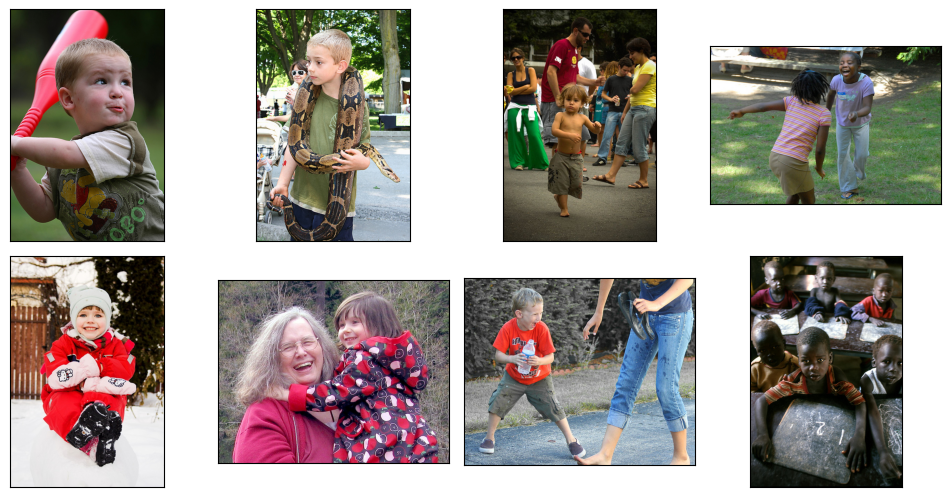

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(8):
    fig.add_subplot(4, 4, i+1)
    image = Image.open(Path(TRAIN_IMAGES_PATH, samples_block[i][:-2]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

plt.show()


Всё в порядке, на изображениях действительно присутствуют дети, удалим их из обучающей выборки.

Ранее мы отмечали, что в составе имени 'query_id' содержится часть имени родного изображения. Попробуем составить список "плохих" изображений, основываясь на списке "плохих" описаний.

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Делаю список плохих изображений.
</div>

In [ ]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50214 entries, 0 to 51322
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       50214 non-null  object 
 1   query_id    50214 non-null  object 
 2   query_text  50214 non-null  object 
 3   score       50214 non-null  float64
 4   to_block    50214 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
bad_text = (general_df[general_df['to_block'] == 1])

In [ ]:
bad_text.sample(3)

,image,query_id,query_text,score,to_block
16463,2610447973_89227ff978.jpg,979383193_0a542a059d.jpg#2,"Six children , all with black hair , sit at a ...",0.000000,1
17945,2693425189_47740c22ed.jpg,2718024196_3ff660416a.jpg#2,A little boy is leaping in the air onto a wate...,0.333333,1
44446,3737539561_d1dc161040.jpg,2842865689_e37256d9ce.jpg#2,The person in the yellow shirt is sitting with...,0.000000,1


In [ ]:
bad_text = list(bad_text['query_id'].str[:-2])

Удалим из обучающего датасета все изображения, имя которого оказалось в списке запрещённых.

In [ ]:
general_df = general_df[~general_df.query_id.str[:-2].isin(bad_text)]

In [ ]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35825 entries, 0 to 51322
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       35825 non-null  object 
 1   query_id    35825 non-null  object 
 2   query_text  35825 non-null  object 
 3   score       35825 non-null  float64
 4   to_block    35825 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.6+ MB


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
К сожалению эту ошибку я очень хорошо знаю, она кочует между студенческих работ с тех пор, как два года назад я не заметил у Вадима (студента одного из первых потоков) .
    
   
          
Ты удаляешь комментарии, в которых были запрещенные слова. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    

И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
Самое обидное, что ты совершенно верно определяешь список фото с детьми и показываешь их, но удаляешь записи  по признаку "в описании есть упоминание детей".    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Поняла, попробовала исправить, проверь, пожалуйста.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> да, сейчас все ОК </div>

**Вывод**
Мы проверили текстовые описания изображений ни изображения на присутствие на них детей и удалили их из обучающего набора данных. Перейдём к векторизации изображений.

# Векторизация изображений

Поскольку длина векторов изображений может быть сильно разной, так как размеры изображений разные, будем использовать свёрточные сети: они позволяют "выделить" главные компоненты изображений.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Вот здесь проблема, и она заключается в том, что  у flow_from_dataframe есть дефолтный аргумент shuffle=True, а значит выдаваемые им изображения перемешиваются, и идут совсем не в том порядке,как в датфрейме.  Как следствие мы получаем эмбеддинги не соответствующие изображениям в датафрейме.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
Не исправлено
    
--------------------
    
Ксения, давай еще раз очень внимательно посмотрим на два ключевых момента в проекте: векторизацию изображений и логику финального тестирования. К сожалению, в обоих блоках остались критические ошибки, которые делают результаты работы некорректными. Я постараюсь объяснить максимально подробно, в чем они заключаются.


Проблема в параметре `shuffle`, который по умолчанию равен `True`. Давай пошагово разберем, что происходит в коде, и почему это "тихая" ошибка, которая ломает все данные, не выдавая сообщения об ошибке.

1.  **Шаг 1: Ты создаешь датафрейм `unique_img`**. В нем картинки идут в определенном, фиксированном порядке. Условно:
    * `0: 'img_A.jpg'`
    * `1: 'img_B.jpg'`
    * `2: 'img_C.jpg'`

2.  **Шаг 2: Ты подаешь этот датафрейм в `ImageDataGenerator`**. Так как ты **не указала `shuffle=False`**, генератор "на лету" в случайном порядке перемешивает этот список. Теперь он будет выдавать картинки, например, в таком порядке: `img_C.jpg`, `img_A.jpg`, `img_B.jpg`.

3.  **Шаг 3: `model.predict()` получает картинки в перемешанном порядке** и создает эмбеддинги в том же самом перемешанном порядке. В нашем примере получится массив эмбеддингов:
    * `0: emb_C` (эмбеддинг для картинки C)
    * `1: emb_A` (эмбеддинг для картинки A)
    * `2: emb_B` (эмбеддинг для картинки B)

4.  **Шаг 4: Катастрофа.** Ты берешь этот **перемешанный** массив эмбеддингов и присваиваешь его как новый столбец к **исходному, неперемешанному** датафрейму `unique_img`. В итоге получается "испорченная" таблица:

| image_name | vector | <-- ОШИБКА! |
| :--- | :--- | :--- |
| `img_A.jpg` | `emb_C` | <-- Эмбеддинг от картинки C |
| `img_B.jpg` | `emb_A` | <-- Эмбеддинг от картинки A |
| `img_C.jpg` | `emb_B` | <-- Эмбеддинг от картинки B |

В результате твоя модель обучается на данных, где векторы изображений не соответствуют их именам. Весь процесс обучения и его результаты, к сожалению, невалидны.

**Как исправить:** Необходимо **явно указать `shuffle=False`** в `train_datagen.flow_from_dataframe`. Это гарантирует, что порядок эмбеддингов на выходе будет строго соответствовать порядку файлов в `unique_img`.
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v3</b> исправлено 👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Чтобы эмбеддинги  были качественными, стоит использовать специальную предобработку, повторяющую условия, при которых модель обучалась.
    
В разделе "компьютерное зрение с pytorch" приведен образец кода, как проводить эту предобработку при использовани моделей pytorch.
    
В случае Keras нужно использовать специальную фукнцию preprocess_input
    
    from keras.applications.resnet50 import preprocess_input
    ...
    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    
--------------
    
Важно: препроцессинг в данном случае отменяет необходимость делать рескейл. Т.е. `preprocessing_function` мы указываем вместо `rescale`.    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Поняла, исправила
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> исправлено 👍 </div>

Для создания эмбендингов сначала создадим список уникальных изображений и векторизируем только его.

In [ ]:
unique_img = pd.DataFrame(general_df['image'].unique(), columns=['image'])

In [ ]:
unique_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Исправлено.
</div>

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=unique_img,
        directory=Path(TRAIN_IMAGES_PATH),
        x_col='image',
        y_col='score',
        target_size=(224, 224),
        batch_size=16,
        class_mode='input',
        shuffle=False,
        seed=42)
features, target = next(train_gen_flow)

Found 1000 validated image filenames.


In [ ]:
def create_model():
    backbone = ResNet50(input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mae'])

    return model

In [ ]:
def vectorize(model, unique_img):
    predictions = model.predict(unique_img)
    return predictions

In [ ]:
model_image = create_model()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
embeddings_image = vectorize(model_image, train_gen_flow)
embeddings_image.shape

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 398s 6s/step


(1000, 2048)

In [ ]:
print("Размер матрицы:", embeddings_image.shape)

Размер матрицы: (1000, 2048)


In [ ]:
unique_img['vector'] = list(embeddings_image)

In [ ]:
unique_img.sample(10)

,image,vector
202,2340206885_58754a799a.jpg,"[0.32192698, 0.18663144, 0.13040821, 0.1167300..."
985,801607443_f15956d1ce.jpg,"[0.020726882, 1.7703394, 0.74333286, 0.0434076..."
547,315880837_90db309bab.jpg,"[0.0423418, 0.023287551, 0.1556406, 0.0, 0.666..."
635,3290105461_7590f23371.jpg,"[1.209849, 1.0604576, 0.0, 0.3759692, 0.294113..."
527,3121521593_18f0ec14f7.jpg,"[1.1415033, 0.39334732, 0.33469772, 1.4288377,..."
975,751109943_2a7f8e117f.jpg,"[0.23569043, 0.012625785, 0.20209523, 0.042409..."
369,2764178773_d63b502812.jpg,"[0.30636048, 0.49448228, 0.17832614, 0.1559679..."
732,3480051754_18e5802558.jpg,"[0.09649635, 3.0089545, 0.16613454, 0.85536754..."
394,2860872588_f2c7b30e1a.jpg,"[0.85469353, 0.59933984, 0.66616255, 0.4173057..."
306,2595186208_9b16fa0ee3.jpg,"[0.0931263, 0.035785202, 0.4542945, 0.04672999..."


Создадим в 'general_df' новый столбец, заполнив его получившимися векторами.

In [ ]:
final_df = pd.merge(general_df, unique_img, on='image', how='left')

In [ ]:
final_df.sample(10)

,image,query_id,query_text,score,to_block,vector
2154,1490213660_9ea45550cf.jpg,2196846255_2c1635359a.jpg#2,A wrinkled dog wading in shallow water .,0.666667,0,"[0.24871507, 1.3919301, 0.59672856, 0.00911639..."
32374,439037721_cdf1fc7358.jpg,439037721_cdf1fc7358.jpg#2,Two people having a picnic by the shore .,1.000000,0,"[1.1018952, 0.31194848, 0.16708031, 0.051323, ..."
16302,2999730677_0cfa1c146e.jpg,2999730677_0cfa1c146e.jpg#2,Two puppies are playing in the leaves .,1.000000,0,"[0.03471576, 1.4508437, 0.11554601, 0.0, 1.690..."
5773,2218609886_892dcd6915.jpg,3106026005_473a7b1c8c.jpg#2,A man wearing an orange cap sits on a white be...,0.000000,0,"[0.06558329, 0.00077036145, 0.058342922, 0.364..."
12599,2723477522_d89f5ac62b.jpg,509778093_21236bb64d.jpg#2,A collie plays with a white ball in a field of...,0.000000,0,"[0.27262208, 0.47298113, 0.03850962, 0.4895946..."
33236,488590040_35a3e96c89.jpg,505929313_7668f021ab.jpg#2,A black dog standing in shallow water with a p...,0.000000,0,"[0.09030476, 1.0106939, 0.2566661, 1.0577419, ..."
7174,2340206885_58754a799a.jpg,2869491449_1041485a6b.jpg#2,two dogs play together .,0.000000,0,"[0.32192698, 0.18663144, 0.13040821, 0.1167300..."
18138,3107513635_fe8a21f148.jpg,300314926_0b2e4b64f5.jpg#2,A wakeboarder leaps in the air .,0.000000,0,"[0.14381914, 1.3718077, 0.2036929, 1.3250914, ..."
17126,3044536048_e615466e7f.jpg,300922408_05a4f9938c.jpg#2,A man kneels in the wet sand at a beach near a...,0.000000,0,"[0.6129666, 0.47186175, 1.507406, 0.0, 0.17317..."
13918,2860872588_f2c7b30e1a.jpg,3450874870_c4dcf58fb3.jpg#2,two men sit on a chairlift .,0.000000,0,"[0.85469353, 0.59933984, 0.66616255, 0.4173057..."


In [ ]:
final_df.isna().sum()

,0
image,0
query_id,0
query_text,0
score,0
to_block,0
vector,0


In [ ]:
embendings = list(final_df['vector'])

In [ ]:
len(embendings)

35825

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">



Давай подумаем о вычислительной эффективности твоего решения. Твой код работает и получает эмбеддинги, но он выполняет огромное количество лишней работы.

**В чем дело:**
Ты подаешь в `ImageDataGenerator` весь датафрейм `train_data`, в котором после очистки остается более 35 тысяч строк. Однако **уникальных изображений** в этом датафрейме всего около 700 (1000 уникальных, около 30% удалим при чистке). Каждая картинка повторяется в датафрейме много раз — по одному разу для каждого своего описания.

В результате твоя нейросеть выполняет одну и ту же тяжелую операцию — векторизацию одного и того же файла — десятки раз подряд. Это сильно замедляет работу и бесцельно тратит вычислительные ресурсы. Объем работы можно сократить почти **в 50 раз**!

**Как это сделать правильно и эффективно:**

1.  **Создай список уникальных изображений.** Собери из твоего рабочего датафрейма `train_data` все уникальные имена файлов (`image`) в отдельный список или небольшой датафрейм.
2.  **Векторизуй только уникальные картинки.** Подай в `ImageDataGenerator` и `model.predict()` именно этот короткий список уникальных изображений. Этот шаг выполнится очень быстро.
3.  **Сохрани эмбеддинги в словарь.** После векторизации у тебя будет список уникальных имен файлов и массив эмбеддингов. Создай из них словарь (хэш-мапу) вида `{'имя_файла.jpg': [вектор], ...}`.
4.  **"Размножь" результаты.** Теперь, когда у тебя есть готовые векторы для всех уникальных картинок, создай новый столбец в основном датафрейме `train_data` и заполни его нужными векторами, используя созданный словарь и столбец `image` как ключ. Это делается очень быстро с помощью метода `.map()`.

Этот подход не только радикально ускорит твой ноутбук, но и является более профессиональным и надежным, так как ты полностью контролируешь процесс и четко сопоставляешь эмбеддинги с их файлами.    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Исправила. Но с .map() у меня криво очень присоединялась, я попробовала иначе сделать.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> ОК </div>

**Вывод**
Мы провели векторизацию изображений с помощью свёрточных сетей ResNet50().

# Векторизация текстов

Для векторизации текста будем использовать tf-idf.

Загрузим список стоп-слов на английском языке.

In [ ]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus = list(final_df['query_text'])

In [ ]:
count_tf_idf = TfidfVectorizer(stop_words=list(stopwords))

In [ ]:
tf_idf = count_tf_idf.fit_transform(corpus)

In [ ]:
print("Размер матрицы:", tf_idf.shape)

Размер матрицы: (35825, 1132)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас вектора рассчитаны с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.

-----------
    
Что касается выбранного подхода. По моим наблюдения используя TfidfVectorizer крайне редко получается обучить толковую модель.  Я бы советовал все-таки использовать "плотные" вектора полученные с помощью BERT    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Подсвечу желтым, чтобы не потерялось.
    
По моим наблюдениям, в этом проекте неплохо показыает себя модель `all-MiniLM-L6-v2` и снятие эмбеддингов не с нулевого токена, а пулингом по информативным токенам.
    
Запустить её можно либо через transformers, либо через sentence-transformers    
    
https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Поняла, принято
</div>

**Вывод**
Мы выполнили векторизацию текста с помощью  tf-idf. Можем перейти к объединению векторов.

#  Объединение векторов

Объединим векторы изображений и векторы текстов с целевой переменной, подготавливая данные для обучения.

In [ ]:
features = np.column_stack((embendings, tf_idf.toarray()))
features.shape

(35825, 3180)

In [ ]:
target = np.array(final_df['score'])
target.shape

(35825,)

Можно перейти к обучению модели.

In [ ]:
train_data.head()

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

# Обучение модели предсказания соответствия

Нам необходимо исключить попадание изображения и в обучающую, и в тестовую выборки. Для этого будем использовать класс GroupShuffleSplit из библиотеки sklearn.model_selection.
В качестве метрики предлагаем использовать RMSE, хоть эта метрика и чувствительна к аномальным значениям.

Разобьём датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

In [ ]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, valid_indices = next(gss.split(X=features, y=target, groups=final_df['image']))

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Все импорты стоит перенести в начало

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Сделано
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Исправила
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [ ]:
X_train, X_valid = features[train_indices], features[valid_indices]

In [ ]:
y_train, y_valid = target[train_indices], target[valid_indices]

In [ ]:
X_train.shape

(24921, 3180)

In [ ]:
X_valid.shape

(10904, 3180)

In [ ]:
y_train.shape

(24921,)

In [ ]:
y_valid.shape

(10904,)

In [ ]:
scaler = Normalizer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Небольшой совет по поводу `StandardScaler`. Он не всегда является лучшим выбором, особенно когда ты работаешь со смешанными типами данных, как у тебя (эмбеддинги ResNet + разреженные векторы TF-IDF). `StandardScaler` может нарушить структуру разреженных признаков, что не очень хорошо.

Рекомендую  посмотреть в сторону `Normalizer(norm='l2')`. Он приводит каждый твой итоговый вектор к единичной длине, что является стандартной практикой для эмбеддингов и отлично работает с TF-IDF, сохраняя его важные свойства. Подробнее ниже</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
В качестве идеи для будущих проектов при работе с эмбеддингами я хотел бы поделиться с тобой альтернативным и, на мой взгляд, более концептуально подходящим подходом к предобработке.

Вместо `StandardScaler` для векторов-эмбеддингов часто используют L2-нормализацию (`Normalizer` в `sklearn`), которая масштабирует каждый вектор к единичной длине. Ключевой момент — применять нормализацию нужно к эмбеддингам изображений и текстов **по отдельности**, *до* их конкатенации.

**Почему это важно?** Это ставит оба типа эмбеддингов в "равные условия", убирая влияние их исходной длины (которая часто является шумом) и оставляя только чистое **направление** в пространстве, несущее семантику. Модели становится проще учиться на чистых, сопоставимых по масштабу сигналах.

Реализовать это можно так:

```python
# Пример кода для раздельной L2-нормализации
from sklearn.preprocessing import Normalizer
import numpy as np

# Разделяем features обратно на эмбеддинги картинок и текстов
# X_train_img, X_train_txt = X_train[:, :512], X_train[:, 512:]
# X_val_img, X_val_txt = X_val[:, :512], X_val[:, 512:]

# Создаем два отдельных нормализатора
img_normalizer = Normalizer(norm='l2')
txt_normalizer = Normalizer(norm='l2')

# Нормализуем эмбеддинги картинок
X_train_img_norm = img_normalizer.fit_transform(X_train_img)
X_val_img_norm = img_normalizer.transform(X_val_img)

# Нормализуем эмбеддинги текстов
X_train_txt_norm = txt_normalizer.fit_transform(X_train_txt)
X_val_txt_norm = txt_normalizer.transform(X_val_txt)

# И только теперь конкатенируем
X_train_prepared = np.hstack([X_train_img_norm, X_train_txt_norm])
X_val_prepared = np.hstack([X_val_img_norm, X_val_txt_norm])
```

Еще раз повторю, твой текущий подход абсолютно корректен. А знание про раздельную нормализацию — это просто еще один мощный инструмент в твой арсенал для работы с мультимодальными данными.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Никогда о таком не слышала! спасибо большое, добавила.
Надеюсь, это то, что ты имел в виду)
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b>
    
 Ты абсолютно права, что выбрала именно `Normalizer`, а не `StandardScaler` — это ключевой момент, и ты его поняла верно.

Ты очень близка к идеальному решению. Сейчас ты применяешь `Normalizer` к уже объединенному вектору. Это хороший шаг, но есть способ сделать еще лучше.

Самый надежный подход — это нормализовать эмбеддинги картинок и текстов **по отдельности**, *до* их объединения. Так ты идеально сбалансируешь их вклад в итоговую модель.

В целом твое текущее решение уже гораздо лучше, чем было, а этот совет — это "шлифовка" и рекомендация на будущее.
</div>

## LinearRegression

Обучим модель линейной регрессии.

In [ ]:
model_lr = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

lm_dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)
y_predict = model_lr.predict(X_valid)
y_predict_dummy_mean = lm_dummy_mean.predict(X_valid)
y_predict_dummy_median = lm_dummy_median.predict(X_valid)

In [ ]:
rmse_lr = mean_squared_error(y_valid, y_predict)
print("f'RMSE для модели линейной регрессии: {:.2f}".format(rmse_lr))

f'RMSE для модели линейной регрессии: 0.05


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Учитывая масштаб данных ошибка получилась достаточно большая. Есть идеи, с чем это может быть связано?

    

    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
В моём случае - с чем угодно))) ты видел, как я подготавливала данные и какие делала ошибки ..
Но в другом случае, может, это связано с тем, что связь не линейная?
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    <b>v2</b>  

Предположение о том, что "связь не линейная" — это абсолютно верное наблюдение! Действительно, сложная зависимость между тысячами признаков из эмбеддингов и человеческой оценкой "похожести" почти никогда не бывает чисто линейной.

Но есть и вторая, даже более важная причина, почему простая линейная регрессия здесь "страдает". Это называется **"проклятие размерности"**.

Представь, что у тебя очень много "рычагов" (коэффициентов модели — в твоем случае их больше 3000), а точек данных, чтобы их настроить, — относительно мало. В такой ситуации `LinearRegression` становится слишком "гибкой": она может найти случайные, шумовые закономерности в обучающих данных и идеально под них подстроиться. Но эти "закономерности" — просто случайность, и они не работают на новых, валидационных данных. Это и есть одна из форм переобучения.

Именно поэтому модели, которые имеют встроенные механизмы регуляризации (как `Ridge` регрессия) или умеют находить нелинейные связи (как нейросети или случайный лес), в таких задачах обычно показывают себя лучше.

Так что твое наблюдение было верным, а теперь ты знаешь и про вторую важную причину.    
</div>

## Нейросеть

In [ ]:
model_nn = Sequential()

model_nn.add(Dense(1024, input_shape=(3180,), activation='relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(loss='mean_squared_error',
                optimizer=Adam(learning_rate=0.0001),
                metrics=[RootMeanSquaredError()])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Обучим нейросеть.

In [ ]:
model_nn.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_valid, y_valid),
    verbose=2
)

Epoch 1/15
779/779 - 51s - 65ms/step - loss: 0.0518 - root_mean_squared_error: 0.2276 - val_loss: 0.0462 - val_root_mean_squared_error: 0.2149
Epoch 2/15
779/779 - 79s - 101ms/step - loss: 0.0481 - root_mean_squared_error: 0.2194 - val_loss: 0.0458 - val_root_mean_squared_error: 0.2139
Epoch 3/15
779/779 - 84s - 108ms/step - loss: 0.0477 - root_mean_squared_error: 0.2183 - val_loss: 0.0457 - val_root_mean_squared_error: 0.2139
Epoch 4/15
779/779 - 83s - 107ms/step - loss: 0.0473 - root_mean_squared_error: 0.2176 - val_loss: 0.0459 - val_root_mean_squared_error: 0.2142
Epoch 5/15
779/779 - 81s - 105ms/step - loss: 0.0472 - root_mean_squared_error: 0.2172 - val_loss: 0.0461 - val_root_mean_squared_error: 0.2147
Epoch 6/15
779/779 - 82s - 105ms/step - loss: 0.0470 - root_mean_squared_error: 0.2169 - val_loss: 0.0456 - val_root_mean_squared_error: 0.2135
Epoch 7/15
779/779 - 81s - 104ms/step - loss: 0.0469 - root_mean_squared_error: 0.2166 - val_loss: 0.0457 - val_root_mean_squared_error: 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Возможно ты воспринимаешь "количество эпох" как гиперпараметр "спущеный с верху". Т.е. устанавливаем параметры сети, запускаем обучение и смотрим на результат.
    
В случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилили архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
    

    

    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).

 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

что можно сделать в нашем случае?    
    
    


1.  **Обучай до сходимости с `EarlyStopping`.** Сейчас ты обучаешь модель ровно 10 эпох. Этого почти всегда недостаточно, чтобы модель нашла оптимальные веса, — скорее всего, ты останавливаешь обучение слишком рано.

      * **Что делать:** Вместо фиксированного числа эпох, используй механизм **`EarlyStopping`**. Это специальный "наблюдатель", который следит за метрикой на валидационной выборке (`val_loss`). Как только метрика перестает улучшаться в течение нескольких эпох (`patience`), он сам останавливает обучение.
      * **Как использовать:** Ставишь очень большое число эпох (например, `epochs=1000`) и добавляешь `EarlyStopping` в `callbacks`. Модель сама найдет лучший момент для остановки.

2.  **Увеличь размер батча (`batch_size`).** Размер батча `32` — это хороший стандарт для многих задач, но для таких, как наша (где признаки уже лежат в памяти), большие батчи часто работают лучше. Они делают обучение более стабильным и могут ускорить сходимость. Попробуй увеличить его до `128` или `256`, это должно дать положительный эффект.

3.  **Поиграй с `Dropout`.** Ты абсолютно правильно добавила `Dropout` — это ключевой инструмент для борьбы с переобучением. Значение `0.2` — это неплохое начало, но часто оптимальные значения лежат в диапазоне **`0.3-0.5`**. Попробуй увеличить его и посмотри, как это повлияет на итоговую метрику на валидации.

Вот как может выглядеть твой обновленный код для обучения:

```python
# 1. Импортируем нужный инструмент
from tensorflow.keras.callbacks import EarlyStopping

# 2. Создаем его экземпляр
# Он будет следить за val_loss и остановит обучение, если улучшений не будет 5 эпох подряд
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 3. Запускаем обучение с новыми параметрами
model_nn.fit(
    X_train,
    y_train,
    epochs=1000,          # Ставим много эпох
    batch_size=256,       # Увеличиваем батч
    validation_data=(X_test, y_test),
    callbacks=[early_stopping], # Добавляем EarlyStopping
    verbose=2
)
```

Эти три изменения — **`EarlyStopping`**, **увеличенный `batch_size`** и **подбор `Dropout`** — это стандартный "джентльменский набор" для тюнинга нейросетей. Он поможет тебе значительно улучшить качество твоей модели.
    

Но это все конечно нужно настраивать на корректных данных... т.е. вначале решить проблемы с подготовкой признаков, т.к. иначе придется учить модель "на мусоре"    
</div>

In [ ]:
pred_nn = model_nn.predict(X_valid)
nn_result = mean_squared_error(y_valid, pred_nn)
nn_result

341/341 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


0.04476997847161941

In [ ]:
result = {'model':['LinearRegression',
                        'Нейросеть'],
               'score':[rmse_lr,
                        nn_result
                       ]
              }
df_results = pd.DataFrame(result)
df_results

,model,score
0,LinearRegression,0.04562
1,Нейросеть,0.04477


Обе модели показали сходный результат.

Данные были разделены на обучающую и тестовую выборки, для исключения попадания изображения и в обучающую, и в тестовую выборки мы использовали класс GroupShuffleSplit из библиотеки sklearn.model_selection. В качестве метрики вы выбрали RMSE, хоть эта метрика и чувствительна к аномальным значениям.
Провели обучение модели с помощью линейной регрессии и нейросети. Обе модели показали сходный результат - 0.0491 и 0.0469 соответственно.

# Тестирование модели

Для тестирования нам необходимо создать функцию, которая принимает на вход текстовое описание, делает векторизацию и возвращает картинку с максимальным значением метрики. Если запрос связан с запретными словами, функция должна вывести предупреждение.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь  тоже проблемы с перемешиванием данных.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Исправила
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
Не исправлено
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Исправила.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v3</b> исправлено 👍 </div>

Для создания эмбендингов изображений создадим список с уникальными значениями.

In [ ]:
unique_test_img = pd.DataFrame(test_queries['image'].unique(), columns=['image'])

In [ ]:
unique_test_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 932.0+ bytes


In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=unique_test_img,
        directory=Path(TEST_IMAGES_PATH),
        x_col='image',
        y_col='score',
        target_size=(224, 224),
        batch_size=16,
        class_mode='input',
        shuffle=False,
        seed=42)

Found 100 validated image filenames.


In [ ]:
def create_model():
    backbone = ResNet50(input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mae'])

    return model

In [ ]:
embeddings_image_test = vectorize(model_image, test_gen_flow)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step


In [ ]:
embeddings_image_test.shape

(100, 2048)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
У тебя всего 100 уникальных тестовых изображений. Зачем же векторизовать 500?.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Логично, исправила
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Категорически  нельзя обучать векторайзер для текстов заново... Это полностью перечеркивает результаты предыдущей работы. Используй тот же самый векторайзер, который ты использовала при подготовке данных для обучения.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Поняла, принято
</div>

Создадим функцию, которая получала бы текст, возвращала картинку и оценку соответствия, выдавала дисклеймер, если запрос некорректный.

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Ты всё понятно объяснил, но если человек не понимает, как написать функцию правильно, ты бессилен)
</div>

In [121]:
def function(text):
  lemm_text = get_lemmas(text)
  stop = 0
  for word in BLOCK_WORDS:
    if word in lemm_text:
      stop = 1
      break

  if stop == 0:
        text_vect = count_tf_idf.transform([text]).toarray()
        features_2 = np.column_stack((embeddings_image_test, np.resize(text_vect, (embeddings_image_test.shape[0], 1132))))
        predictions = model_nn.predict(features_2)

        results_df = pd.DataFrame({'image': unique_test_img['image'],
                                   'score': predictions.flatten()
                                   })
        top_5_results = results_df.sort_values(by='score', ascending=False).head(5)
        print(text)

        fig = plt.figure(figsize=(15, 3))
        for i, (idx, row) in enumerate(top_5_results.iterrows()):
          image_name = row['image']
          score = row['score']

          fig.add_subplot(1, 5, i + 1)
          image = Image.open(Path(TEST_IMAGES_PATH, image_name))
          plt.imshow(image)
          plt.title(f'Score: {score:.2f}') # Показываем реальную оценку
          plt.xticks([])
          plt.yticks([])

  else:
        result = print('This image is unavailable in your country in compliance with local laws.')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
A shirtless man wearing a vest walks on a stage with his arms up .
This image is unavailable in your country in compliance with local laws.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Two women are operating a laptop connected to a camera in a parking lot with a third person standing by .
This image is unavailable in your country in compliance with local laws.
This image is unavailable in your country in compliance with local laws.


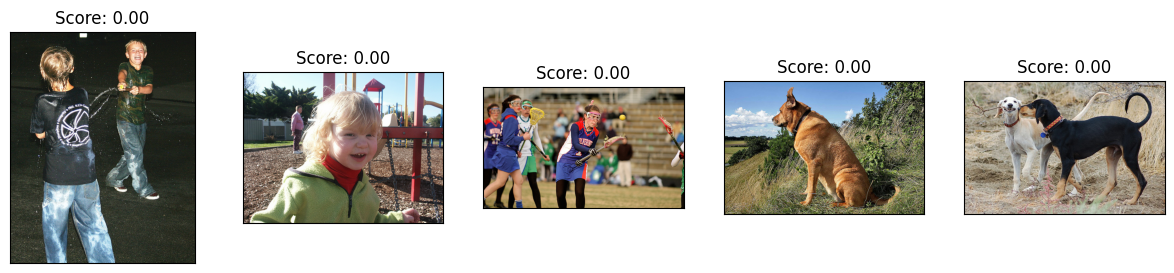

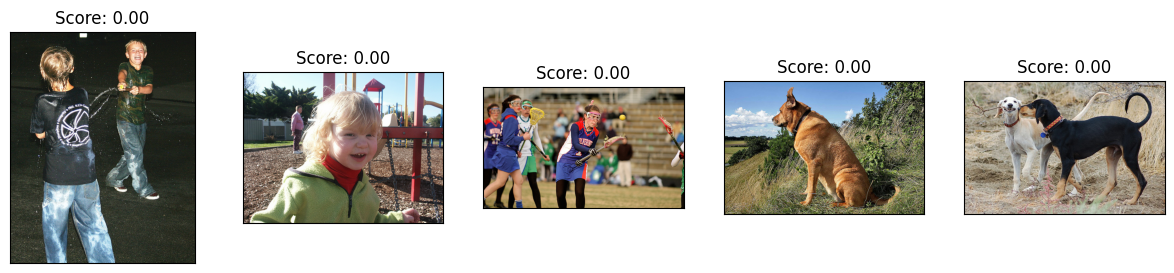

In [125]:
control_2 = test_queries['query_text'].sample(5)
for i in control_2:
    function(i)

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Дим, спасибо большое за помощь и терпение.
sigmoid исправила.

вопрос по коду: у меня нет вопросов про нулевые предсказания, и так видно, что текст не подходит картинке. Но почему в итоге функция возвращает один и тот же ряд картинок на разные текстовые запросы?
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Похоже функция для тестирования у тебя не работает... Пожалуйста исправь ошибки после чего мы сможем оценить качество её работы

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь я попрошу тебя немного переделать логику инференса.
    
Ты уже на финишной прямой курса и во всю ипользуешь функции. Поэтому я попрошу тебя оформить тестирование следующим образом: нужно написать функцию, способную искать изображение по заданному описанию.

  Что должна делаь функция
    
   - Получать текст
   - Возвращать картинку и метрику близости.
   - Выдавать дисклеймер если запрос некорректный
    
А затем нужно 10 раз применить функцию к 10 случайным запросам.   
    
Т.е. функция должна работать с любым запросом. Поэтому векторизацию запроса мы делаем в теле функции. А вот векторизацию изображений лучше сделать заранее.
    
Внутри функции должны выполняться векторизация текста + получение 100 пар (вектор текста + вектор изображения). Для каждой пары получаем предсказание модели и выбираем пару с наивысшей оценкой соотвтствия.   
    
    
-------------------
    
Сейчас у тебя есть функция, которая вроде бы должна искать изображения по описаниям, но она реализована очень странно. Начиная с того, что она использует объект predictions - это предсказания, которые ты получила на валидационной выборке от линейной регрессии.   
    
.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    

Ты переписала функцию, но ее текущая логика все еще не решает поставленную задачу.

Задача этой функции — **продемонстрировать поиск**: принять на вход **один** текстовый запрос и найти для него **самое подходящее** изображение из **всего** набора тестовых картинок.

Что сейчас делает твоя функция `function(text)`:
1.  Она получает на вход текст, например, `'a dog on the beach'`.
2.  Внутри она **игнорирует этот конкретный текст** и векторизует сразу **все 500 текстов** из `test_queries`.
3.  Она получает 500 предсказаний для 500 заранее известных пар.
4.  Затем она сортирует результаты, но **не использует** этот отсортированный список для вывода.
5.  В конце она просто находит в исходной таблице `test_queries` строку с текстом `'a dog on the beach'` и показывает **заранее известный правильный ответ** (`ground truth`) из этой строки.

Твоя функция не ищет. Она просто показывает правильный ответ из датасета. Это не является решением задачи тестирования.

**Как должен выглядеть правильный алгоритм поиска "один ко всем":**
1.  Функция принимает на вход **один** текст.
2.  Она получает для него **один** текстовый вектор.
3.  Она создает **100** новых пар, объединив этот один текстовый вектор со **всеми 100** заранее посчитанными векторами тестовых картинок.
4.  Она подает эти 100 пар в **обученную** модель и получает 100 оценок соответствия.
5.  Она находит индекс картинки с **максимальной** оценкой и выводит именно эту найденную картинку на экран.

Пожалуйста, исправь эти два момента. Они являются ключевыми для всего проекта.    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    


Ксения, мы на финишной прямой\! Спасибо за твое упорство. Я вижу, что ты почти решила обе проблемы, но в каждой остался один маленький, но критический нюанс. Давай разберем их очень подробно, и я уверен, что это будет финальная итерация.

-----

**Часть 1. Как правильно сопоставить предсказания с картинками в тесте**

Ты абсолютно права, что для поиска нужно создать 100 пар "текст + картинка" и получить для них 100 предсказаний. Ты это сделала\! Ошибка происходит на самом последнем шаге, когда ты пытаешься найти, какой картинке какая оценка соответствует.

**В чем проблема:**
Твои 100 предсказаний (`predictions`) идут в том же порядке, что и 100 картинок в твоем датафрейме `unique_test_img`.
Но в этой строке:
`df = pd.concat((test_queries, pd.Series(..., name='predictions')), axis=1)`
ты пытаешься "приклеить" эти 100 предсказаний к таблице `test_queries`, где **500 строк** и картинки идут в совершенно другом порядке. В итоге предсказание для 1-й уникальной картинки сопоставляется с 1-й строкой из `test_queries`, для 2-й — со 2-й, и так далее. А это совершенно разные картинки\! Поэтому порядок "ломается", и ты видишь в топе не те изображения.

**Как это исправить очень просто?**
Тебе вообще не нужен `test_queries` на этом шаге. Нужно просто создать новый, маленький датафрейм из двух частей: имен уникальных картинок и их предсказаний.

Вот готовый, рабочий код, который нужно вставить в твою функцию `function(text)` после строки `predictions = model_nn.predict(features_2)`:

```python
# --- НАЧАЛО ИСПРАВЛЕНИЯ ---

# Шаг 1: Создаем простой и корректный датафрейм с результатами
# Он будет содержать 100 строк: имя уникальной картинки и ее оценка
results_df = pd.DataFrame({
    'image': unique_test_img['image'],
    'score': predictions.flatten()     
})

# Шаг 2: Сортируем этот маленький датафрейм и выбираем топ-5
top_5_results = results_df.sort_values(by='score', ascending=False).head(5)

# Шаг 3: Теперь используем top_5_results в твоем цикле для отображения
print(text)
fig = plt.figure(figsize=(15, 3))
for i, (idx, row) in enumerate(top_5_results.iterrows()):
    image_name = row['image']
    score = row['score']
    
    fig.add_subplot(1, 5, i + 1)
    image = Image.open(Path(TEST_IMAGES_PATH, image_name))
    plt.imshow(image)
    plt.title(f'Score: {score:.2f}') # Показываем реальную оценку
    plt.xticks([])
    plt.yticks([])

# --- КОНЕЦ ИСПРАВЛЕНИЯ ---
```

Этот код заменит всю твою логику после `model_nn.predict()`. Он гарантированно покажет 5 картинок с самыми высокими **реальными** оценками.

-----

**Часть 2. Почему предсказания \> 1 и как это исправить**

Тут ты тоже близка к истине. Твоя модель выдает значения \> 1, потому что в последнем слое у тебя `activation='linear'`.

Как ты и предположила, модель **недообучена**. На небольшом датасете ей проще минимизировать ошибку (MSE), выдавая значения вроде `1.1` для цели `1.0`, чем идеально подгонять выход ровно в `1.0`.

Поэтому в задачах, где нам нужен выход, похожий на вероятность, есть "страховка" — активация **`sigmoid`** в последнем слое. Она математически "зажимает" любой выход модели в диапазон `(0, 1)`, гарантируя, что предсказания всегда будут адекватными. Это также помогает модели сфокусироваться и обучаться стабильнее.

**Что нужно сделать:**
В ячейке, где ты определяешь `model_nn`, просто измени последнюю строку:

```python
# Было:
# model_nn.add(Dense(1, activation='linear'))

# Стало:
model_nn.add(Dense(1, activation='sigmoid'))
```

Это не только решит проблему с "вылетающими" значениями, но и, скорее всего, улучшит качество обучения.

Пожалуйста, внеси эти два исправления. Надеюсь, после этого все заработает как надо.    

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Я постаралась исправить, проверь, пожалуйста.

У меня только вопрос насчёт метрики близости. Я верно понимаю, что её нужно использовать, чтобы определить схожесть двух векторов, в нашем случае мы определяем схожесть запроса и найденного изображения? я попробовала сделать, но получается ерунда) решила у тебя уточнить, верно ли я поняла, что нужно сделать.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому.
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения.
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0).
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768).
    
   
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">

    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert (лучший результат дает модель  `all-MiniLM-L6-v2`)
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
</div>

# Вывод

Нами была протестирована модель, которая сравнивала описание изображения и само изображение. Мы учли, чтобы из запросов были исключены запрещённые слова. Для тестирвоания нами была выбрана модель, которая показала лучший результат при обучении, но по результатам тестирования можно заключить, что модель нужнается в усовершенствовании. Для улучшения результатов, возможно, стоит рассмотреть другие методы векторизации текста и изображений.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также начаты работы по тестированию.

    
Пожалуйста отработай все красные комментарии.
    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Дима, я хотела выразить тебе огромную благодарность. Этот проект оказался для меня вообще самым сложным на курсе, ещё и как будто всё время не хватало информации ни на курсе, ни от преподавателя. А твоё ревью оказалось очень богато и на советы, и на информацию, и на рекоменлации. Спасибо тебе большое!
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

И тебе спасибо за обратную связь.  
    
Прекрасно понимаю сложность этого проекта, поэтому стараюсь по мере сил помогать.  Скажу честно - этот проект самый сложный для ревью и времени на него тратится наверное на порядок больше, чем остальные.
    
Однако тут есть и возможности для развития )).    
    
Осталась пара красных комментариев. Один очень простой для исправления (нужно просто добавить параметр). Что касается функции - то надеюсь что сейчас я смог донести до тебя логику, которую нужно заложить в эту функцию и работа будет проще и быстрее.
    
Жду работу на повторное ревь (очень надеюсь что финальное). Про дедлайн знаю и понимаю (сам работан на финальном спринте), думаю что мы все успеем.
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
О, абсолютно уверена, что не финальное. Не получается у меня написать эту функцию. Ты всё очень понятно объясняешь, к тебе вообще вопросов нет, я просто не понимаю, как написать, чтобы это работало.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v3</b>

Осталась буквально одна правка, жду проект на финальное ревью.
</div>